In [7]:
import numpy as np
import pandas as pd
from deap import algorithms

from preprocessing import preprocess_data
from setup import setup_ea
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, plot_fitness_over_generations

In [8]:
stock_data, ta_features, _ = preprocess_data("./data/wig_d.csv")
ta_features

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_cr
365,0.006009,0.094874,0.941641,0.800880,0.820727,0.901769,0.615958,0.136714,0.459783,0.341002,...,0.714163,0.847761,0.883304,0.550882,0.754635,0.800912,0.454282,0.095323,0.723399,0.217329
366,0.010085,0.067148,0.908381,0.790832,0.819671,0.900598,0.613798,0.138438,0.493822,0.341002,...,0.714442,0.843452,0.880940,0.545478,0.774311,0.824712,0.455591,0.095391,0.682926,0.216556
367,0.030662,0.093509,0.968945,0.836003,0.821472,0.900718,0.652594,0.140952,0.516197,0.369727,...,0.733597,0.845106,0.879435,0.552450,0.775482,0.844046,0.431166,0.095770,0.740789,0.231158
368,0.021698,0.128281,0.921666,0.831179,0.821483,0.899950,0.658175,0.144114,0.555109,0.369727,...,0.682954,0.845887,0.878413,0.556376,0.820520,0.870848,0.472013,0.096149,0.691829,0.232766
369,0.014627,0.103969,0.872146,0.805248,0.817366,0.900179,0.647337,0.146147,0.526596,0.360938,...,0.685832,0.843416,0.877019,0.553355,0.788863,0.884323,0.399113,0.096263,0.669190,0.228294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.976102,0.938315,0.783798,0.993424,0.871783,0.991989,0.811603,0.312019,0.649625,0.412539,...,0.921568,0.966601,0.937050,0.723119,0.714089,0.754736,0.447659,0.349639,0.825358,0.471939
2279,0.981290,0.923087,0.820142,0.955853,0.829428,0.982671,0.809756,0.323694,0.666461,0.410112,...,0.931230,0.984643,0.956861,0.725604,0.695299,0.767887,0.397341,0.371642,0.681307,0.470523
2280,0.981810,0.906549,0.779111,0.914818,0.819299,0.980124,0.802191,0.335261,0.582716,0.410112,...,0.931895,0.993649,0.974810,0.710479,0.690118,0.777104,0.375822,0.379975,0.668755,0.465184
2281,0.994691,0.928762,0.837785,0.910447,0.817958,0.979381,0.814606,0.347676,0.654219,0.410112,...,0.915056,1.000000,0.990651,0.693349,0.733067,0.795286,0.424862,0.388276,0.706705,0.471686


In [9]:
# Genetic algorithm parameters:
POPULATION_SIZE = 100
N_GENERATIONS = 100
TOURNAMENT_SIZE_POPULATION_RATIO = 0.1
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.2

# Simulation parameters:
INITIAL_MONEY = 1000
# COMMISSION = 0.0001 # 0.01%
COMMISSION = 0

In [10]:
population, toolbox, stats, hall_of_fame = setup_ea(
    stock_data,
    ta_features,
    POPULATION_SIZE,
    TOURNAMENT_SIZE_POPULATION_RATIO,
    INITIAL_MONEY,
    COMMISSION,
)

/Users/dariuszpiwowarski/Library/Caches/pypoetry/virtualenvs/inwestycje-6TvPtgFG-py3.10/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/dariuszpiwowarski/Library/Caches/pypoetry/virtualenvs/inwestycje-6TvPtgFG-py3.10/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
_, logbook = algorithms.eaSimple(
    population,
    toolbox,
    ngen=N_GENERATIONS,
    cxpb=CROSSOVER_PROBABILITY,
    mutpb=MUTATION_PROBABILITY,
    stats=stats,
    halloffame=hall_of_fame,
    verbose=True,
)

gen	nevals	avg            	std           	min           	max            
0  	100   	[1078.26997349]	[178.91962512]	[648.03205949]	[1586.18765608]
1  	59    	[1254.38075663]	[229.0633479] 	[764.96692071]	[1774.65648111]
2  	61    	[1358.65180208]	[280.44827414]	[715.73527358]	[1836.25957392]
3  	57    	[1479.43775223]	[294.52985351]	[815.37392282]	[1836.25957392]
4  	68    	[1575.42735305]	[260.56975557]	[744.49704891]	[2044.17106169]
5  	51    	[1765.02406435]	[208.10524357]	[969.31350087]	[2175.6040319] 
6  	69    	[1822.87053313]	[277.63885044]	[996.68492237]	[2250.27563582]
7  	53    	[2053.97025154]	[169.17519693]	[1522.43792354]	[2378.3377092] 
8  	69    	[2093.56434699]	[219.47945609]	[1484.16728946]	[2485.97488999]
9  	63    	[2173.62157894]	[195.91135172]	[1650.20510464]	[2485.97488999]
10 	67    	[2274.70406045]	[191.38690027]	[1662.25360871]	[2532.97127605]
11 	69    	[2296.33329327]	[215.52094316]	[1591.85128891]	[2532.97127605]
12 	60    	[2378.07249566]	[203.59244391]	[159

Process SpawnPoolWorker-20:
Process SpawnPoolWorker-19:
Process SpawnPoolWorker-18:
Process SpawnPoolWorker-17:
Process SpawnPoolWorker-16:
Process SpawnPoolWorker-14:
Process SpawnPoolWorker-15:
Process SpawnPoolWorker-13:
Process SpawnPoolWorker-11:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/dariuszpiwowarski/.pyenv/versions/3.10.5/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/dariuszpiwowarski/.pyenv/versions/3.10.5/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dariuszpiwowarski/.pyenv/versions/3.10.5/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/Users/dariuszpiwowarski/.pyenv/versions/3.10.5/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/dariuszpiwowarski/.pyenv/versions/3.10.5/lib/python3.10/multipro

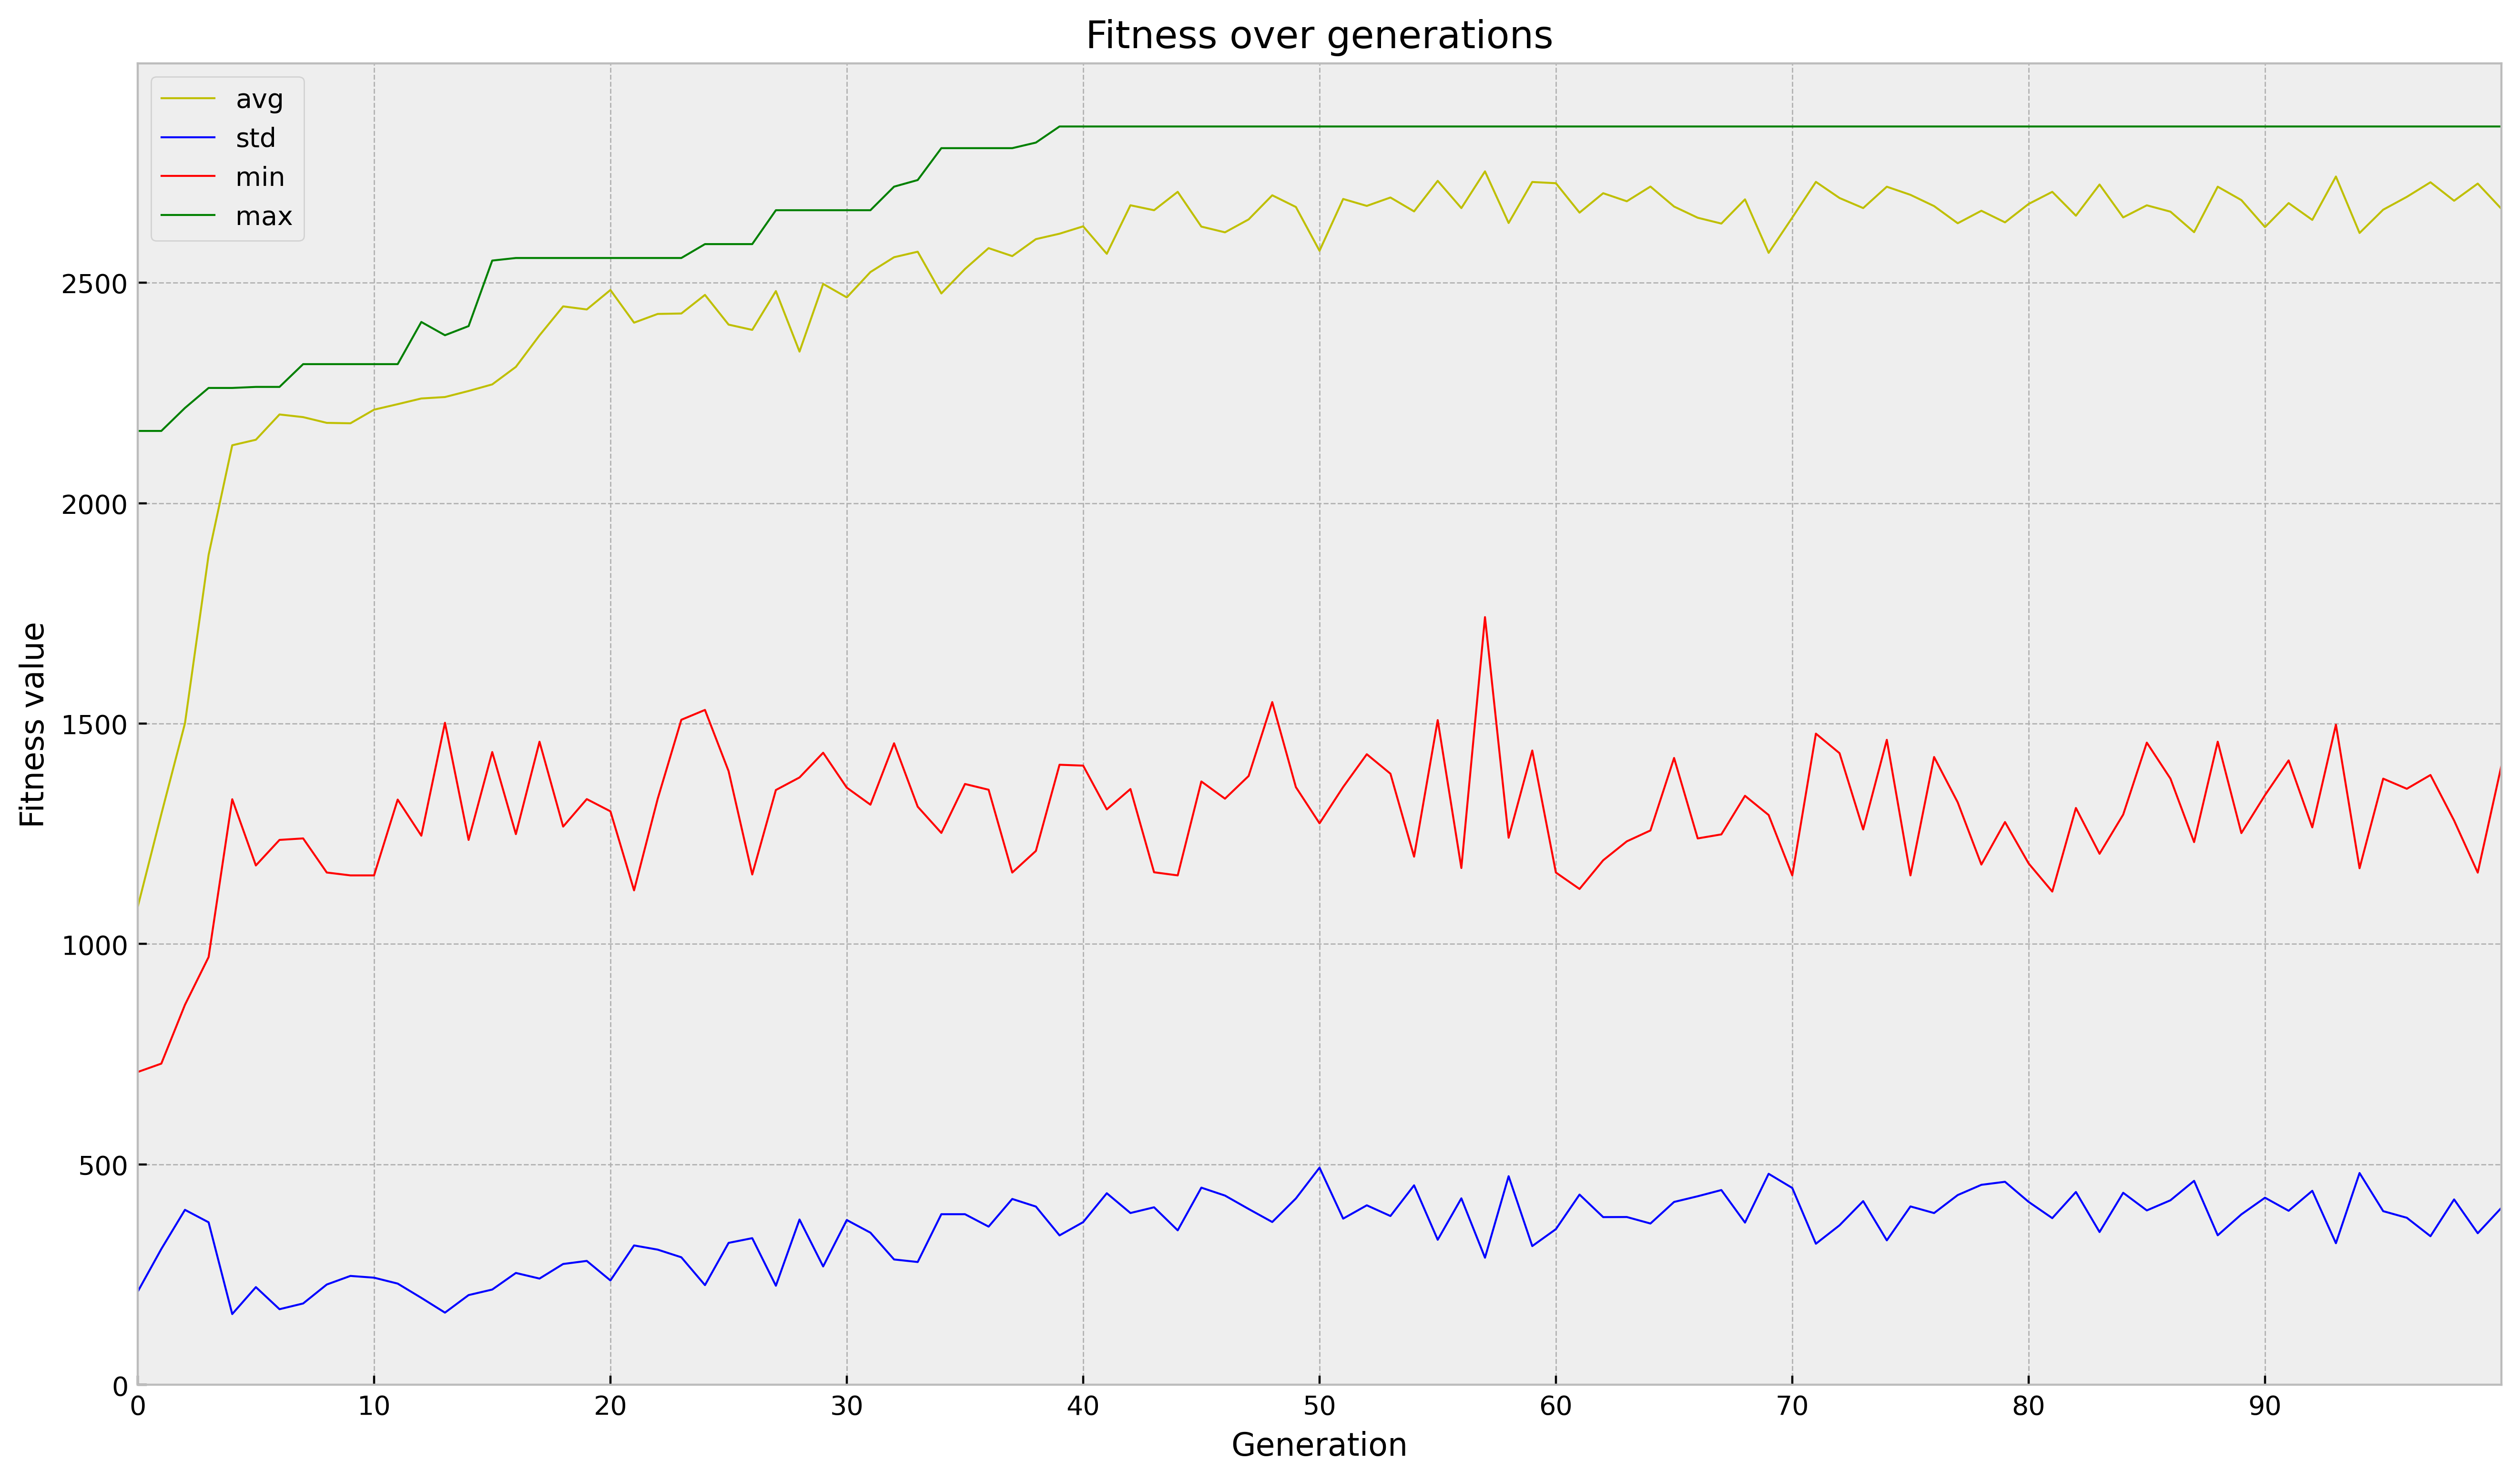

In [6]:
plot_fitness_over_generations(logbook)

In [ ]:
best_strategy = hall_of_fame[0]
buy_strategy, sell_strategy = np.array_split(best_strategy, 2)
pd.DataFrame(
    zip(ta_features.columns, buy_strategy, sell_strategy),
    columns=["feature", "buy strategy weight", "sell strategy weight"],
)

In [ ]:
print_strategy(stock_data, ta_features, best_strategy, INITIAL_MONEY, COMMISSION)

In [ ]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
    stock_data,
    ta_features,
    best_strategy,
    INITIAL_MONEY,
    COMMISSION,
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)